### **LAB ASSIGNMENT 4**
### **HIMANSHU BAWEJA**
### **E20CSE212**

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
import seaborn as sns
from matplotlib import pyplot as plt


### **Read the data from provided dir.**

In [2]:
df=pd.read_csv('student-mat.csv',sep=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [5]:
XY=df.iloc[:,-2:]
XY

,G2,G3
0,6,6
1,5,6
2,8,10
3,14,15
4,10,10
...,...,...
390,9,9
391,16,16
392,8,7
393,12,10


In [6]:
XY.describe()

,G2,G3
count,395.000000,395.000000
mean,10.713924,10.415190
std,3.761505,4.581443
min,0.000000,0.000000
25%,9.000000,8.000000
50%,11.000000,11.000000
75%,13.000000,14.000000
max,19.000000,20.000000


In [7]:
X=XY.iloc[:,:-1]
X

,G2
0,6
1,5
2,8
3,14
4,10
...,...
390,9
391,16
392,8
393,12


In [8]:
Y=XY.iloc[:,-1:]
Y

,G3
0,6
1,6
2,10
3,15
4,10
...,...
390,9
391,16
392,7
393,10


In [9]:
X.shape

(395, 1)

In [11]:
Y.shape

(395, 1)

In [12]:
X

,intercept,G2
0,1,6
1,1,5
2,1,8
3,1,14
4,1,10
...,...,...
390,1,9
391,1,16
392,1,8
393,1,12


In [14]:
XY.head(10)

,G2,G3
0,6,6
1,5,6
2,8,10
3,14,15
4,10,10
5,15,15
6,12,11
7,5,6
8,18,19
9,15,15


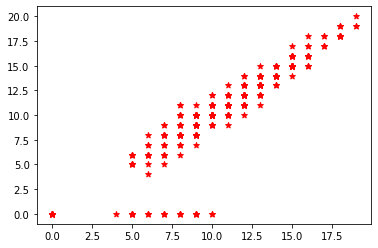

In [15]:
plt.scatter(X.iloc[:,1],Y,marker="*",color="red")
plt.show()

In [16]:
def predict(x,w):
  ypred = np.dot(X,w)
  return ypred

In [17]:
def MSE(yob, ypred): 
    error = np.mean((yob-ypred)**2)/2
    return error

In [18]:
def gradient(X, yob, ypred):
    grad = np.zeros(2,)
    grad[0] = np.mean((ypred - yob))
    grad[1] = np.mean((ypred - yob)*X[:,1])
    return grad

In [22]:
def grades(X, y, alpha=0.001,itera=100):
    w=np.random.rand(2)
    loss=[]
    for i in range(itera):
       ypred=predict(X,w)
       error=MSE(y,ypred)
       loss.append(error)
       grads = gradient(X, y , ypred)
       w[0]=w[0] - alpha*grads[0]
       w[1]=w[1] - alpha*grads[1]
    return w, loss

In [21]:
weight,loss = grades(X.values, Y.values)

In [23]:
ypred = predict(X,weight)
print(weight)

[0.29465128 0.84190141]


In [24]:
print("Mean squared error:", loss[-1])

Mean squared error: 16.07664412809394


In [25]:
weight

array([0.29465128, 0.84190141])

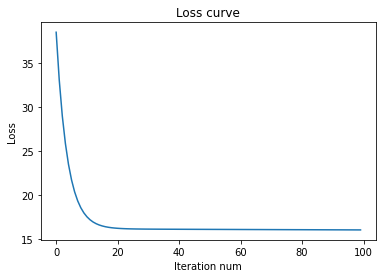

In [26]:
plt.plot([i for i in range(len(loss))], loss)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Loss")
plt.show()

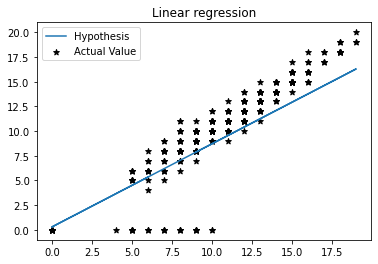

In [27]:
plt.title("Linear regression")
plt.scatter(X.iloc[:,1], Y,marker="*",color="black",label='Actual Value')
plt.plot(X.iloc[:,1], ypred,label='Hypothesis')
plt.legend()
plt.show()